# Sales Performance Analysis
This project demonstrates basic statistical analysis on a sales dataset to showcase data analysis skills for Data Analysis. We use descriptive statistics, visualizations, correlation analysis, grouped statistics, and hypothesis testing.

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

Load the Dataset

In [2]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# Data Exploration

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


Handling Missing Values
Fill missing values in non-critical columns to prepare for analysis.

In [4]:
df['ADDRESSLINE2'].fillna('', inplace=True)
df['STATE'].fillna('Unknown', inplace=True)
df['POSTALCODE'].fillna('Unknown', inplace=True)
df['TERRITORY'].fillna('Unknown', inplace=True)

# Descriptive Statistics
Compute basic statistics for key numerical columns like SALES and QUANTITYORDERED.

In [5]:
print('Mean Sales:', df['SALES'].mean())
print('Median Sales:', df['SALES'].median())
print('Standard Deviation of Sales:', df['SALES'].std())

print('\nMean Quantity Ordered:', df['QUANTITYORDERED'].mean())
print('Median Quantity Ordered:', df['QUANTITYORDERED'].median())
print('Standard Deviation of Quantity Ordered:', df['QUANTITYORDERED'].std())

Mean Sales: 3553.88907190932
Median Sales: 3184.8
Standard Deviation of Sales: 1841.8651057401805

Mean Quantity Ordered: 35.09280906836698
Median Quantity Ordered: 35.0
Standard Deviation of Quantity Ordered: 9.74144273706961


# Visualization - Sales Distribution
Plot a histogram to visualize the distribution of sales values.

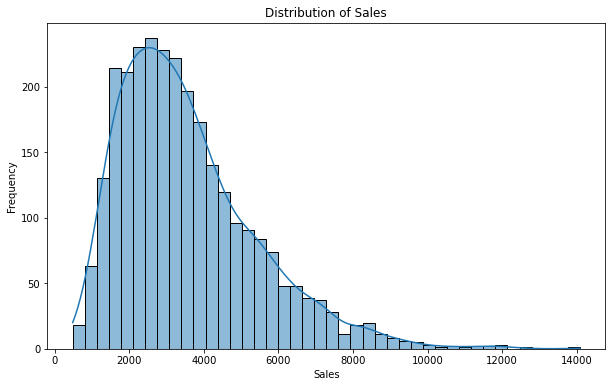

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SALES'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Correlation Analysis
Create a heatmap to show correlations between numerical variables.

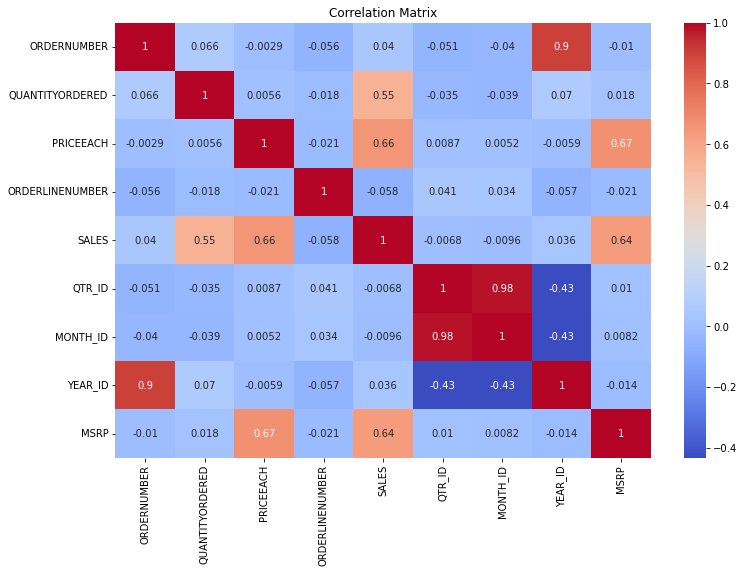

In [7]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Grouped Statistics
Group by PRODUCTLINE and compute mean, median, and standard deviation of SALES.

In [9]:
grouped = df.groupby('PRODUCTLINE')['SALES'].agg(['mean', 'median', 'std'])
print(grouped)

                         mean    median          std
PRODUCTLINE                                         
Classic Cars      4053.377104  3761.370  2050.694132
Motorcycles       3523.831843  3127.820  1837.292757
Planes            3186.286176  2841.805  1519.539168
Ships             3053.150128  2884.925  1073.705150
Trains            2938.226883  2445.600  1456.595976
Trucks and Buses  3746.810100  3449.400  1671.719775
Vintage Cars      3135.339110  2795.270  1787.568540


# Hypothesis Testing
Perform a t-test to check if there's a significant difference in sales between the USA and other countries.

In [10]:
us_sales = df[df['COUNTRY'] == 'USA']['SALES']
other_sales = df[df['COUNTRY'] != 'USA']['SALES']

t_stat, p_val = stats.ttest_ind(us_sales, other_sales)
print('T-statistic:', t_stat)
print('P-value:', p_val)

if p_val < 0.05:
    print('There is a significant difference in sales between USA and other countries.')
else:
    print('No significant difference.')

T-statistic: 1.2782975174677325
P-value: 0.20124970583793125
No significant difference.
